# 2 | Class Session B | Team coding: RAW processing
**ES143 Computer Vision, Harvard University, Fall 2020**

Name: **Wisoo Song (Team8)**

Collaborator: **Runjia Tian**

---

In this team coding task you will learn to:
* read and manipulate RAW image files in the DNG file format
* visualize RAW image values

To maximize your learning, you and your teamate(s) must each create and maintain your own active notebooks. However, this task is an open collaboration, so it is acceptable for you to look at each other's code (i.e., screen share) during development and debugging.

When you are done: 
1. Post one or more of your team's visualizations to [padlet](https://padlet.com/zickler/rawviz). Be sure to title your post "Team ##" (breakout number).
2. Have each team member submit their `.ipynb` and `.html` files [here](https://canvas.harvard.edu/courses/78234/assignments/406705) in Canvas. Filenames should be of the form `rawviz_lastname_firstname.ipynb` and `rawviz_lastname_firstname.html`. 

---

Your task is to create a compelling visualization of the RAW (RGB-mosaicked) data in a RAW image file. 

The input RAW image file that is required to complete this task is named `flower.dng` in canvas. Be sure to upload this file to the same directory as this notebook. 

This assignment uses the RawPy package, which is a Python wrapper for the LibRaw library. This is a very useful library for working with RAW image files and for emulating in-camera rendering processes. You will need the documentation. It's here:

[https://letmaik.github.io/rawpy/api/rawpy.RawPy.html](https://letmaik.github.io/rawpy/api/rawpy.RawPy.html)

You are also likely to need help during this breakout task. To request a visit to your breakout room, post to the `#rawviz` channel in Slack (e.g., Can we get some help in Breakout 3?)

In [1]:
# install rawpy package. This is a python wrapper for LibRaw.
# Documentation at https://letmaik.github.io/rawpy/api/rawpy.RawPy.html

# You may need to restart the kernel (Kernel -> Restart) after running this cell
%pip install rawpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import any required libraries here
import cv2                               # OpenCV
import numpy as np                       # numpy
import os
import rawpy

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters or use plt.figure(figsize=[H, W]) before specific plots.
plt.rcParams['figure.figsize'] = [10, 10]

## Work here

The next cell is where you'll do your work. We've pre-polulated it with some basic code to get you started. The comments describe what this code is doing. Your task is to modify this cell to compute and display one or more nice-looking visualizations of the RGB-mosaicked values within the entire RAW image file, or within some selected region of interest in the RAW image file. 

These two operations RawPy will be particularly helpful: `raw.color_desc` and `raw.colors`. See [the documentation](https://letmaik.github.io/rawpy/api/rawpy.RawPy.html) for details.

(-0.5, 4031.5, 3023.5, -0.5)

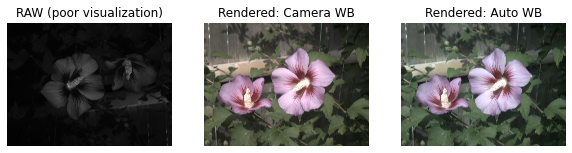

In [3]:
raw = rawpy.imread('./flower.dng')         # read RAW data. Output type is rawyp.RawPy
im2 = raw.postprocess(use_camera_wb=True)  # render 8-bit HxWx3 image using camera's presecribed WB
im3 = raw.postprocess(use_auto_wb=True)    # render 8-bit HxWx3 image using auto-estimate of WB
imr = raw.raw_image                        # HxW numpy array with mosaicked RGB values

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(imr,cmap='gray')
plt.title('RAW (poor visualization)')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(im2)
plt.title('Rendered: Camera WB')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(im3)
plt.title('Rendered: Auto WB')
plt.axis('off')

# To do: add your own code here


In [4]:
print(type(raw))

<class 'rawpy._rawpy.RawPy'>


In [5]:
raw.raw_colors

array([[0, 1, 0, ..., 1, 0, 1],
       [1, 2, 1, ..., 2, 1, 2],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 2, 1, ..., 2, 1, 2],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 2, 1, ..., 2, 1, 2]], dtype=uint8)

In [6]:
print(raw.raw_colors.shape)

(3024, 4032)


In [7]:
print(raw.raw_image)

[[538 558 535 ... 607 570 616]
 [561 538 550 ... 562 602 566]
 [538 559 538 ... 598 577 619]
 ...
 [544 534 546 ... 587 650 594]
 [538 549 531 ... 661 602 653]
 [547 531 540 ... 587 656 587]]


1) Crop out the flower portion from:
    - raw.raw_colors
    - raw.raw_image
    
    Figure out the ordering of 0,1,2 index (RGB BGR?)
    ==> Wisoo
    
2) Separate color maps with np.where( 0, 1 ,2 ) ==> Runjia

3) Turn each map --> Reshuffle the order of color maps 
     - Scale back to 0~255
      - [234][0][236][][][][][][]  G
      - [  
      

In [8]:
print(raw.color_desc)
print(np.max(raw.raw_colors))

b'RGBG'
2


In [9]:
top_idx = 3024//20*10
bot_idx = 3024//20*12
left_idx = 3024//20*11
right_idx = 3024//20*13

flower_intensity = raw.raw_image[top_idx:bot_idx,left_idx:right_idx]
flower_idx = raw.raw_colors[top_idx:bot_idx,left_idx:right_idx]





In [10]:
def normalize(array, a = 0, b = 255, t = int):
    norm = array.max() - array.min()
    normalized = ((array - array.min())/norm*(b - a) + a).astype(t)
    return normalized


# flower_intensity = normalize(flower_intensity) # Whether we should do global scaling | color-wise scaling



In [26]:
## 2) Separate color maps with np.where( 0, 1 ,2 ) ==> Runjia

r_channel = np.where(flower_idx == 0, flower_intensity,0)
g_channel = np.where(flower_idx == 1, flower_intensity,0)
b_channel = np.where(flower_idx == 2, flower_intensity,0)

## 3) Scale all the channels to 0~255
r_channel = normalize(r_channel)
g_channel = normalize(g_channel, b=195)
b_channel = normalize(b_channel)



combined = np.dstack([r_channel, g_channel, b_channel])

In [27]:
print(r_channel)
print("Max R value:", np.max(r_channel))
print("Max G value:", np.max(g_channel))
print("Max B value:", np.max(b_channel))


[[  0 235   0 ... 177   0 177]
 [  0   0   0 ...   0   0   0]
 [  0 232   0 ... 181   0 172]
 ...
 [  0   0   0 ...   0   0   0]
 [  0 127   0 ... 200   0 205]
 [  0   0   0 ...   0   0   0]]
Max R value: 255
Max G value: 195
Max B value: 255


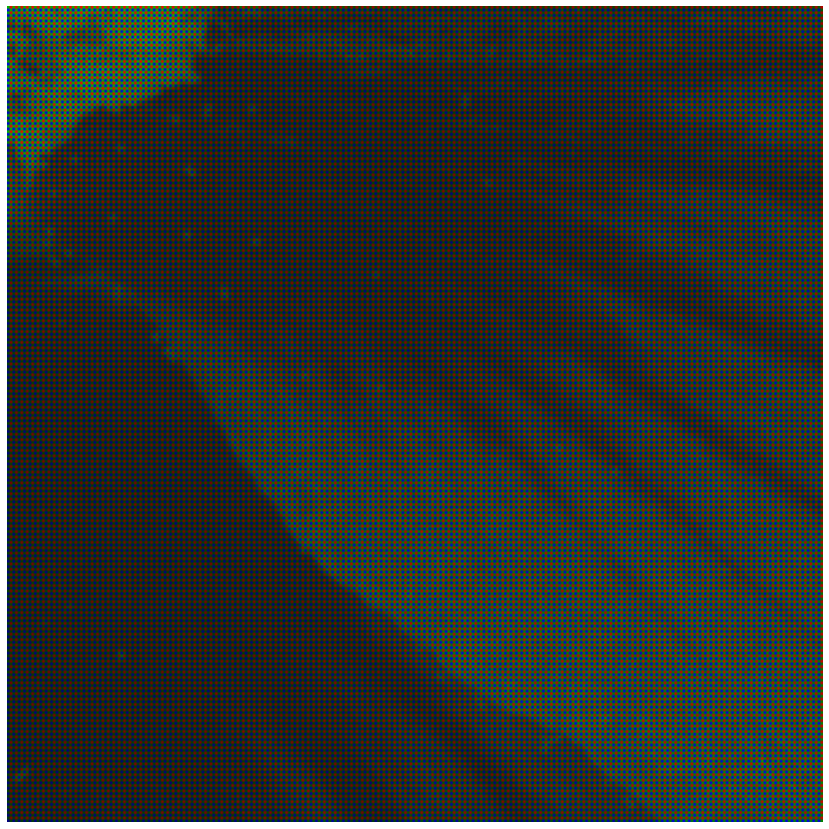

In [28]:
# f = plt.figure()
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(combined)
